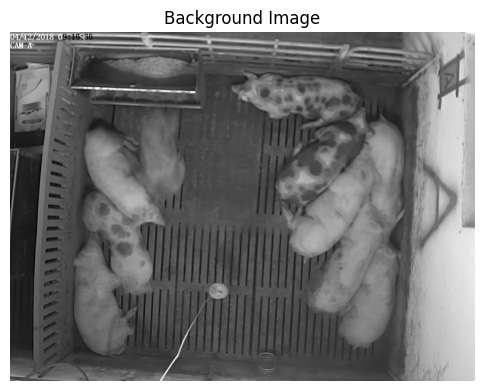

In [3]:
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Load video
path = "/data/bioeng/pigs/videosPenA_2018_12_04_9h04_12h14/1_Manual Record_2018-12-04 09-04-54_2018-12-04 09-17-31.mp4"
cap = cv2.VideoCapture(path)

# Get total frame count
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Number of frames to sample
num_frames = 100

# Randomly select unique frame indices
frame_indices = sorted(random.sample(range(total_frames), num_frames))

frames = []

for idx in frame_indices:
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)  # Seek to frame
    ret, frame = cap.read()
    if not ret:
        continue
    frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

# Compute median background
background = np.median(frames, axis=0).astype(np.uint8)

# Release video
cap.release()

# Show background image
plt.figure(figsize=(6, 6))
plt.imshow(background, cmap='gray')
plt.title("Background Image")
plt.axis("off")
plt.show()
